In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns

Index(['Timestamp', 'Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Where do you climb?',
       'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
    

In [4]:
df

,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Where do you climb?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,...,Frequency of Endurance training sesions per week,Endurance training,General Strength Training frequency per week,Time spent General strength training (hours),Type of Strength training,"Other activities (ie yoga, cardio)",Max pull up reps,5 rep max weighted pull ups,max push ups reps,max L-sit time
0,29/01/2017 20:12:46,Male,173,77,178,4.5 - 5 years,Indoor and outdoor climbing,V8,V8,V6,...,1,4x4,3,4,"Antagonists, Legs, Core",NaN,15,29kg,40,30
1,29/01/2017 20:17:27,Male,180,81,180,3 - 3.5 years,Indoor Climbing only,V3,V3,V1,...,1,Laps of routes,2,2,"Antagonists, Legs, Core, Upper body pulling, U...","Yoga, stretching",11,5kg,24,15sec
2,29/01/2017 20:28:14,Male,178,67,175,.5 - 1 years,Indoor and outdoor climbing,V7,V6,V5,...,2,"4x4, ARC, route climbing intervals",3,2,"Antagonists, Core, Upper body pulling, Upper b...",soccer,17,20 kg,NaN,NaN
3,29/01/2017 20:51:08,Male,173,70,178,9 - 9.5 years,Indoor and outdoor climbing,V5,V4,V3,...,1,"Laps of routes, route climbing intervals",0,0,"Antagonists, Legs, Core, No other strength tra...",NaN,8,NaN,30,NaN
4,29/01/2017 21:03:19,Male,184,84,197,6.5 - 7 years,Indoor and outdoor climbing,V10,V10,V7,...,2,"4x4, Max moves, threshold intervals",2,1,"Core, Upper body pushing",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27/05/2025 08:54:39,Male,175,75,186,6 - 6.5 years,Indoor and outdoor climbing,V8,V8,V5,...,0,I don't train for endurance,3,3,Upper body pulling,NaN,NaN,NaN,NaN,NaN
657,29/05/2025 01:29:25,Male,178,80,183,1.5 - 2 years,Indoor Climbing only,V6,V6,V3,...,1,ARC,1,1,"Core, Upper body pulling, Upper body pushing",Yoga,12,NaN,20,NaN
658,04/06/2025 22:05:03,Male,195,88,195,More than 15 years,Indoor and outdoor climbing,V11,V11,V8,...,0,Laps of routes,0,0,No other strength training,"Running, biking",19,NaN,25,NaN
659,06/06/2025 08:12:08,Male,173,67,175,9 - 9.5 years,Indoor and outdoor climbing,V10,V9,V6,...,0,hangboard repeater protocols,0,0,No other strength training,NaN,16,35kg,50,40 seconds


In [5]:
df.describe()

,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Hangboard Frequency per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours)
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,2.977307,6.620272,2.901664,0.956127,0.360061,0.311649,0.645991,1.756430,2.048411
std,1.091746,3.378113,2.847276,1.119881,0.738862,0.766535,0.873136,1.390327,2.137845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,4.000000,9.000000,4.000000,2.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,7.000000,24.000000,16.000000,7.000000,6.000000,9.000000,7.000000,7.000000,15.000000


In [6]:
df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'].unique()


array(['0', nan, '8', '?', '6',
       '14mm, can hang 8mm less than 10. No steps between', '-', '18',
       '10mm', '10', '16', '5mm, 1KG', '8mm', '13 mm, 9 kg', '15',
       'unknown', '20mm', '10 +13', '10mm, 5kg', '7mm + 7.5kg', '12', '7',
       'not applicable ', 'Unknown', '6mm 10kg', '20', 'N/a',
       '14mm, 27kg', '14mm, 47,5',
       'Moon hangboard (advanced one) smallest edge, 30 kg added weight',
       '190', "Haven't tested", '6mm', '17mm', '7mm, +20',
       'Idk the really small one', '12, +0', 'unsure', '12mm, 7,5 kg',
       "I don't know. I use a moon fingerboard and I rarely hang for 10 s.",
       'Na', "10mm shouldn't add weight...", '14', "Didn't do min edge",
       'Not done before', '8mm, +8', '8 mm', ' 6 mm 10 seconds',
       '12mm +11.34kg', '8mm(rptc)', 'na', '6mm ', '14, 29', '8,+15',
       '3mm', '5mm', '18mm', '25', '4', '13mm + 20kg', '12, 30', '17',
       '18,+1', '14mm +5kg', '12mm + 40kg', '8mm, +5kg',
       "I don't hangboard", '10mm +0kg', 

In [7]:
grip_types = [
    'Half Crimp', 'Open Crimp', 'Full Crimp', 'Front 3', 'Back 3', 'Front 2',
    'Back 2', 'Middle 2', 'Slopers', 'Pinch', 'Monos'
]
for grip in grip_types:
    df[grip] = df['Hangboard grips used '].str.contains(grip, case=False, na=False).astype(int)#
    
hangboard_styles = [
    "Repeaters",
    "Other protocol",
    "Max weight",
    "Min Edge",
    "One arm hang program",
    "no hangs",
    "I don't hangboard"
]

for style in hangboard_styles:
    df[style] = df['Style of Hangboarding chosen '].str.contains(style, case=False, na=False).astype(int)
    
endurance_styles = [
    '4x4',
    'Laps of routes',
    'ARC',
    'route climbing intervals',
    'Max moves',
    'threshold intervals',
    'hangboard repeater protocols',
    'Feet on campusing',
    'systems boards',
    'other',
    "I don't train for endurance"
]

for style in endurance_styles:
    df[style] = df['Endurance training '].str.contains(style.replace("'", ""), case=False, na=False).astype(int)

In [8]:
def extract_weight(val):
    if pd.isna(val):
        return None
    val = str(val).lower()
    
    
    invalid_keywords = ['unknown', 'n/a', 'na', 'not applicable', 'can\'t', 'haven\'t', 'i don\'t', 'no hang', 'not done', '?', 'one hand', 'i only', 'n a']
    if any(keyword in val for keyword in invalid_keywords):
        return None
    # Extract all numbers (handles decimal, comma, plus)
    match = re.findall(r'[-+]?\d+(?:[.,]\d+)?', val)
    
    if not match:
        return None
    
    # Convert first match to float
    weight_str = match[0].replace(',', '.')
    try:
        return float(weight_str)
    except ValueError:
        return None
def extract_edge_size_int(text):
    if pd.isna(text):
        return None
    match = re.search(r'(\d+)\s*mm', str(text).lower())
    if match:
        return int(match.group(1))
    return None

def midpoint(text):
    match = re.findall(r'\d+(?:\.\d+)?', text)
    if match:
        return sum(map(float, match)) / len(match)
    return None

In [9]:
colnames =['Height (cm)','Weight (KG)','Arm Span (cm)','Hardest V Grade ever climbed ','Hardest V Grade climbed in the Last 3 months', 
           'The V grade you can send 90-100% of routes ','Hardest Route grade climbed (Ewbank grade) ','Hardest route climbed last 3 months (ewbank)',
           'Route grade you can send 90-100% of climbs','Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
           'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)','Max pull up reps','5 rep max weighted pull ups',
           'max push ups reps','max L-sit time '
           
           ]

In [10]:
for col in colnames:
    df[col] = df[col].apply(extract_weight)
    
    
df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'] = df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'].apply(extract_edge_size_int)
df['Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) '] = df['Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) '].apply(extract_edge_size_int)

df['How long have you been climbing for encoded?'] = df['How long have you been climbing for?'].apply(midpoint)

climb_where = df[['Where do you climb?']]  # Double brackets = keeps it as a DataFrame

# Step 2: Create and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
climb_encoded = encoder.fit_transform(climb_where)

# Step 3: Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(
    climb_encoded,
    columns=encoder.get_feature_names_out(['Where do you climb?']),
    index=df.index  # Ensures alignment when merging
)

# Step 4: Merge into original df and optionally drop original column
df = pd.concat([df.drop(columns=['Where do you climb?']), encoded_df], axis=1)

df = df.dropna(subset=['Hardest V Grade ever climbed '])

In [11]:
df['Hardest V Grade ever climbed '].unique()

array([ 8.,  3.,  7.,  5., 10.,  4.,  2.,  9.,  6., 11., 13.,  1., 12.,
        0., 14.])

In [12]:
len(df)

641

In [13]:
df

,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,Hardest Route grade climbed (Ewbank grade),...,threshold intervals,hangboard repeater protocols,Feet on campusing,systems boards,other,I don't train for endurance,How long have you been climbing for encoded?,Where do you climb?_Indoor Climbing only,Where do you climb?_Indoor and outdoor climbing,Where do you climb?_Outdoor Climbing only
0,29/01/2017 20:12:46,Male,173.0,77.0,178.0,4.5 - 5 years,8.0,8.0,6.0,NaN,...,0,0,0,0,0,0,4.75,0.0,1.0,0.0
1,29/01/2017 20:17:27,Male,180.0,81.0,180.0,3 - 3.5 years,3.0,3.0,1.0,17.0,...,0,0,0,0,0,0,3.25,1.0,0.0,0.0
2,29/01/2017 20:28:14,Male,178.0,67.0,175.0,.5 - 1 years,7.0,6.0,5.0,21.0,...,0,0,0,0,0,0,3.00,0.0,1.0,0.0
3,29/01/2017 20:51:08,Male,173.0,70.0,178.0,9 - 9.5 years,5.0,4.0,3.0,21.0,...,0,0,0,0,0,0,9.25,0.0,1.0,0.0
4,29/01/2017 21:03:19,Male,184.0,84.0,197.0,6.5 - 7 years,10.0,10.0,7.0,NaN,...,1,0,0,0,0,0,6.75,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27/05/2025 08:54:39,Male,175.0,75.0,186.0,6 - 6.5 years,8.0,8.0,5.0,25.0,...,0,0,0,0,0,0,6.25,0.0,1.0,0.0
657,29/05/2025 01:29:25,Male,178.0,80.0,183.0,1.5 - 2 years,6.0,6.0,3.0,22.0,...,0,0,0,0,0,0,1.75,1.0,0.0,0.0
658,04/06/2025 22:05:03,Male,195.0,88.0,195.0,More than 15 years,11.0,11.0,8.0,32.0,...,0,0,0,0,0,0,15.00,0.0,1.0,0.0
659,06/06/2025 08:12:08,Male,173.0,67.0,175.0,9 - 9.5 years,10.0,9.0,6.0,26.0,...,0,1,0,0,0,0,9.25,0.0,1.0,0.0


In [14]:
df 

,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,Hardest Route grade climbed (Ewbank grade),...,threshold intervals,hangboard repeater protocols,Feet on campusing,systems boards,other,I don't train for endurance,How long have you been climbing for encoded?,Where do you climb?_Indoor Climbing only,Where do you climb?_Indoor and outdoor climbing,Where do you climb?_Outdoor Climbing only
0,29/01/2017 20:12:46,Male,173.0,77.0,178.0,4.5 - 5 years,8.0,8.0,6.0,NaN,...,0,0,0,0,0,0,4.75,0.0,1.0,0.0
1,29/01/2017 20:17:27,Male,180.0,81.0,180.0,3 - 3.5 years,3.0,3.0,1.0,17.0,...,0,0,0,0,0,0,3.25,1.0,0.0,0.0
2,29/01/2017 20:28:14,Male,178.0,67.0,175.0,.5 - 1 years,7.0,6.0,5.0,21.0,...,0,0,0,0,0,0,3.00,0.0,1.0,0.0
3,29/01/2017 20:51:08,Male,173.0,70.0,178.0,9 - 9.5 years,5.0,4.0,3.0,21.0,...,0,0,0,0,0,0,9.25,0.0,1.0,0.0
4,29/01/2017 21:03:19,Male,184.0,84.0,197.0,6.5 - 7 years,10.0,10.0,7.0,NaN,...,1,0,0,0,0,0,6.75,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27/05/2025 08:54:39,Male,175.0,75.0,186.0,6 - 6.5 years,8.0,8.0,5.0,25.0,...,0,0,0,0,0,0,6.25,0.0,1.0,0.0
657,29/05/2025 01:29:25,Male,178.0,80.0,183.0,1.5 - 2 years,6.0,6.0,3.0,22.0,...,0,0,0,0,0,0,1.75,1.0,0.0,0.0
658,04/06/2025 22:05:03,Male,195.0,88.0,195.0,More than 15 years,11.0,11.0,8.0,32.0,...,0,0,0,0,0,0,15.00,0.0,1.0,0.0
659,06/06/2025 08:12:08,Male,173.0,67.0,175.0,9 - 9.5 years,10.0,9.0,6.0,26.0,...,0,1,0,0,0,0,9.25,0.0,1.0,0.0


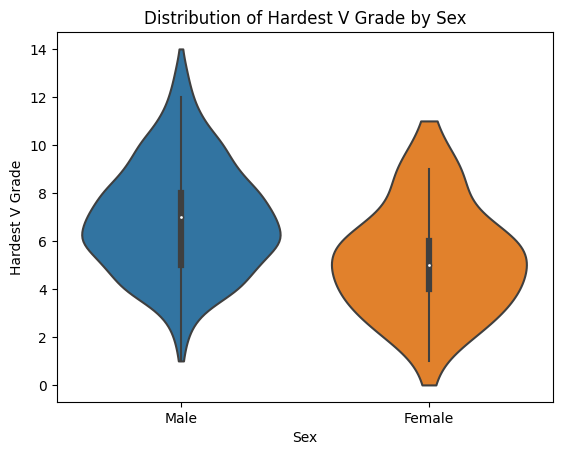

In [15]:
sns.violinplot(
    data=df,
    x='Sex',  # Categorical variable
    y='Hardest V Grade ever climbed ' , # Numerical variable
    cut=0
)
plt.title('Distribution of Hardest V Grade by Sex')
plt.ylabel('Hardest V Grade')
plt.xlabel('Sex')
plt.show()




In [16]:
climb_order = [
    '0 - .5 years',
    '.5 - 1 years',
    '1 - 1.5 years',
    '1.5 - 2 years',
    '2 - 2.5 years',
    '2.5 - 3 years',
    '3 - 3.5 years',
    '3.5 - 4 years',
    '4 - 4.5 years',
    '4.5 - 5 years',
    '5 - 5.5 years',
    '5.5 - 6 years',
    '6 - 6.5 years',
    '6.5 - 7 years',
    '7 - 7.5 years',
    '7.5 - 8 years',
    '8 - 8.5 years',
    '8.5 - 9 years',
    '9 - 9.5 years',
    '9.5 - 10 years',
    '10 - 10.5 years',
    '10.5 - 11 years',
    '11 - 11.5 years',
    '11.5 - 12 years', 
    '12 - 12.5 years', 
    '12.5 - 13 years', 
    '13 - 13.5 years', 
    '13.5 - 14 years',
    '14 - 14.5 years', 
    '14.5 - 15 years',
    'More than 15 years'
    
]

In [17]:
df['Frequency of climbing sessions per week'].unique()

array([4, 1, 3, 2, 6, 0, 5, 7])

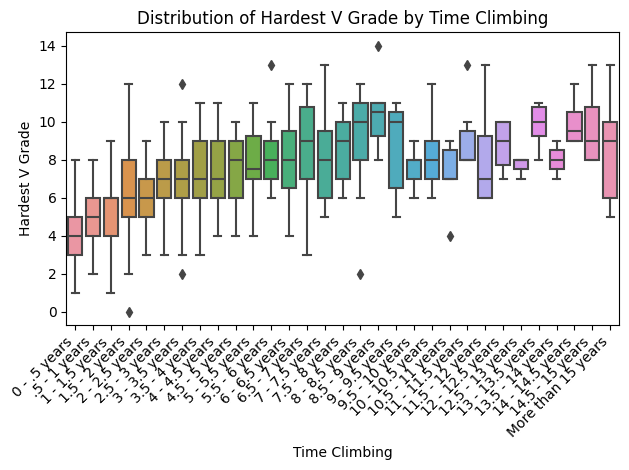

In [18]:
sns.boxplot(
    data=df,
    x='How long have you been climbing for?',
    y='Hardest V Grade ever climbed ',
    order=climb_order,

)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Hardest V Grade by Time Climbing')
plt.ylabel('Hardest V Grade')
plt.xlabel('Time Climbing')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['Timestamp', 'Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
       'Min Edge used (mm, +kg if 

<Axes: xlabel='Frequency of climbing sessions per week', ylabel='Hardest V Grade ever climbed '>

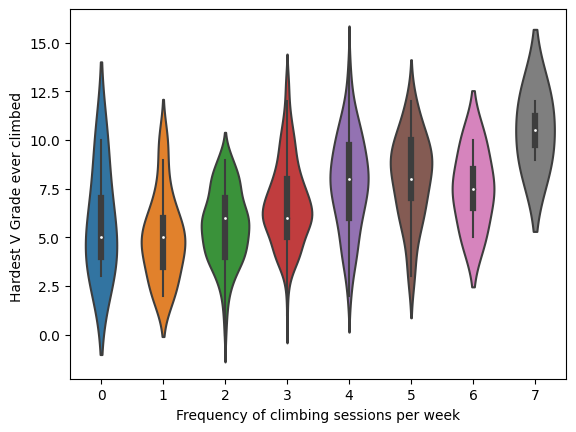

In [20]:
sns.violinplot(
    data=df,
    x='Frequency of climbing sessions per week',
    y='Hardest V Grade ever climbed '
)

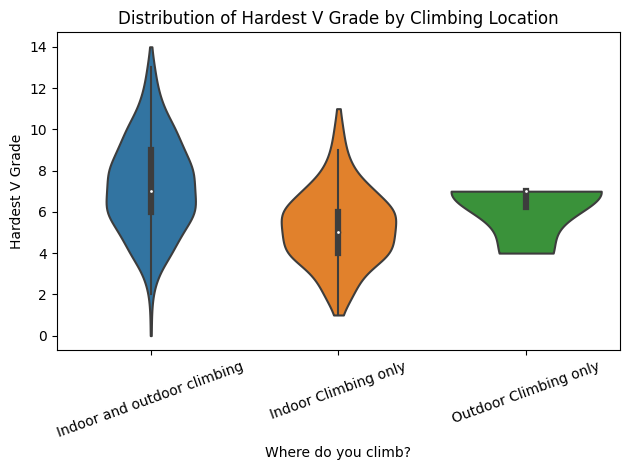

In [21]:
one_hot_cols = [
    'Where do you climb?_Indoor Climbing only',
    'Where do you climb?_Indoor and outdoor climbing',
    'Where do you climb?_Outdoor Climbing only'
]

df['Climbing Location'] = df[one_hot_cols].idxmax(axis=1).str.replace('Where do you climb?_', '')
sns.violinplot(
    data=df,
    x='Climbing Location',
    y='Hardest V Grade ever climbed ',
    cut=0
)
plt.title('Distribution of Hardest V Grade by Climbing Location')
plt.xlabel('Where do you climb?')
plt.ylabel('Hardest V Grade')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [22]:
vln_list = [ 'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Campus Board frequency per week ','Frequency of Endurance training sesions per week','General Strength Training frequency per week ']

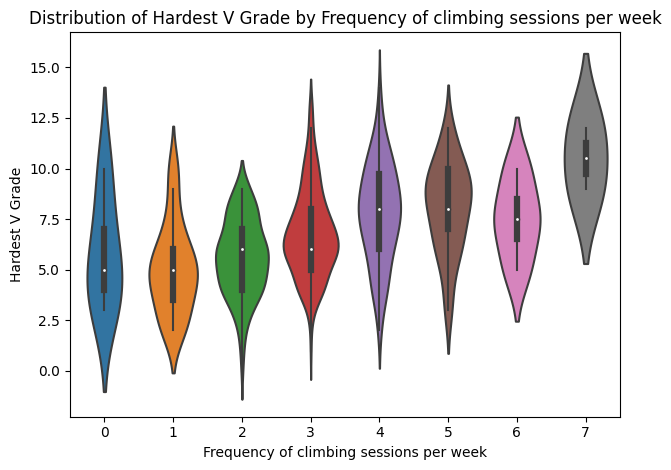

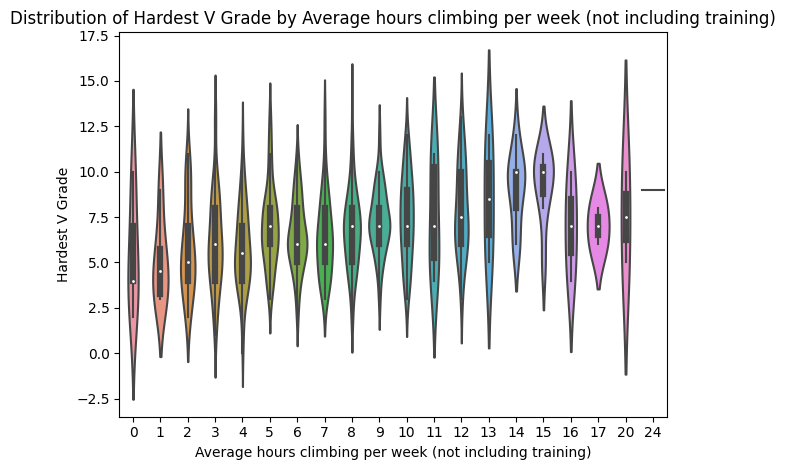

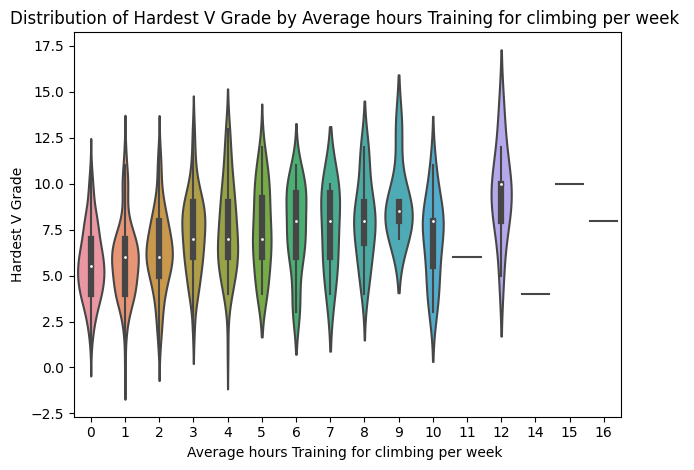

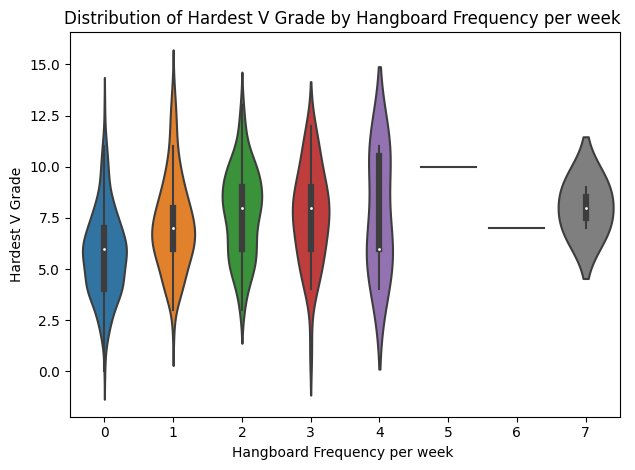

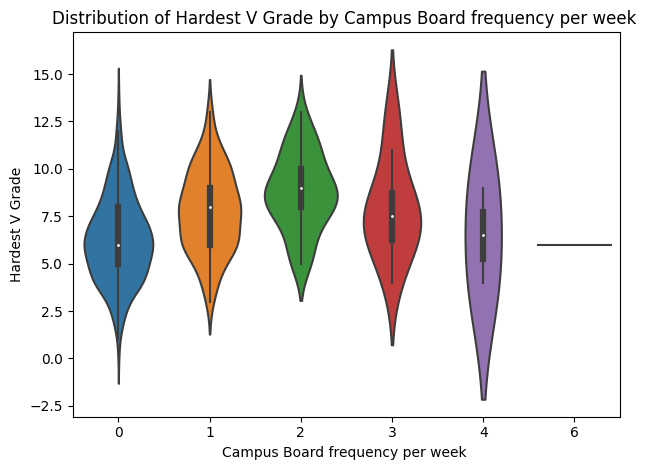

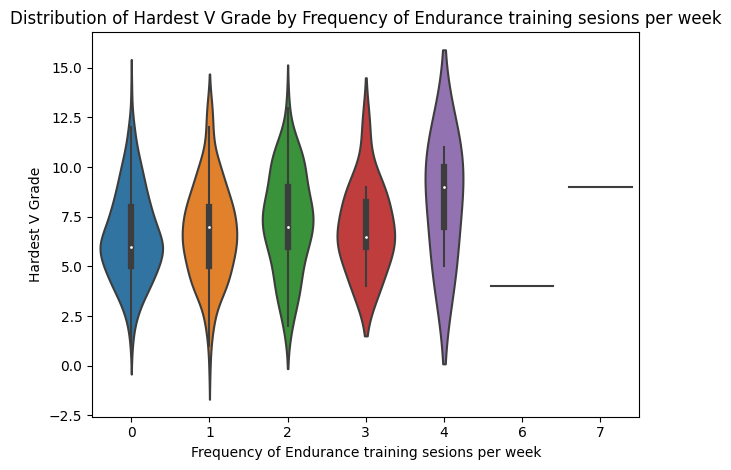

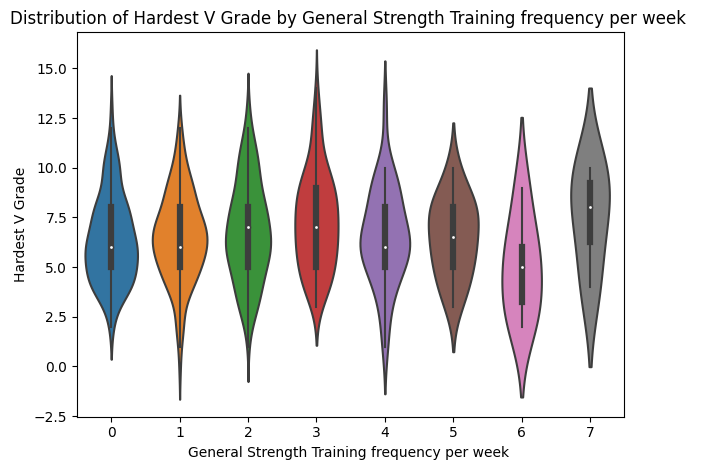

In [23]:
for col in vln_list:
       sns.violinplot(
              data=df,
              x=col,
              y='Hardest V Grade ever climbed '
       )
       plt.title(f'Distribution of Hardest V Grade by {col}')
       plt.xlabel(col)
       plt.ylabel('Hardest V Grade')
       #plt.xticks(rotation=20)
       plt.tight_layout()
       plt.show()

In [25]:
df.isna().sum()

Timestamp                                           0
Sex                                                 0
Height (cm)                                         0
Weight (KG)                                         1
Arm Span (cm)                                      23
                                                   ..
How long have you been climbing for encoded?        0
Where do you climb?_Indoor Climbing only            0
Where do you climb?_Indoor and outdoor climbing     0
Where do you climb?_Outdoor Climbing only           0
Climbing Location                                   0
Length: 68, dtype: int64

In [26]:
df.head(5).style.set_table_attributes('style="overflow-x: auto; display: inline-block;"')


,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,Hardest Route grade climbed (Ewbank grade),Hardest route climbed last 3 months (ewbank),Route grade you can send 90-100% of climbs,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Hangboard Frequency per week,Hangboard grips used,Style of Hangboarding chosen,Max Weight hangboard 18mm edge - Half crimp (KG) (10 seconds) (added weight only),Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds) (added weight only),"Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)","Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds)",Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,Endurance training,General Strength Training frequency per week,Time spent General strength training (hours),Type of Strength training,"Other activities (ie yoga, cardio)",Max pull up reps,5 rep max weighted pull ups,max push ups reps,max L-sit time,Half Crimp,Open Crimp,Full Crimp,Front 3,Back 3,Front 2,Back 2,Middle 2,Slopers,Pinch,Monos,Repeaters,Other protocol,Max weight,Min Edge,One arm hang program,no hangs,I don't hangboard,4x4,Laps of routes,ARC,route climbing intervals,Max moves,threshold intervals,hangboard repeater protocols,Feet on campusing,systems boards,other,I don't train for endurance,How long have you been climbing for encoded?,Where do you climb?_Indoor Climbing only,Where do you climb?_Indoor and outdoor climbing,Where do you climb?_Outdoor Climbing only,Climbing Location
0,29/01/2017 20:12:46,Male,173.000000,77.000000,178.000000,4.5 - 5 years,8.000000,8.000000,6.000000,nan,nan,nan,4,8,6,0,I don't Hangboard,I don't hangboard,0.000000,0.000000,nan,nan,0,0,1,4x4,3,4,"Antagonists, Legs, Core",nan,15.000000,29.000000,40.000000,30.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4.750000,0.000000,1.000000,0.000000,Indoor and outdoor climbing
1,29/01/2017 20:17:27,Male,180.000000,81.000000,180.000000,3 - 3.5 years,3.000000,3.000000,1.000000,17.000000,nan,nan,1,3,10,2,"Open Crimp, Front 3, Back 3, Middle 2, Slopers",Repeaters,nan,81.000000,nan,nan,0,0,1,Laps of routes,2,2,"Antagonists, Legs, Core, Upper body pulling, Upper body pushing","Yoga, stretching",11.000000,5.000000,24.000000,15.000000,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.250000,1.000000,0.000000,0.000000,Indoor Climbing only
2,29/01/2017 20:28:14,Male,178.000000,67.000000,175.000000,.5 - 1 years,7.000000,6.000000,5.000000,21.000000,21.000000,19.000000,3,4,3,2,Open Crimp,Other protocol,25.000000,25.000000,nan,nan,0,0,2,"4x4, ARC, route climbing intervals",3,2,"Antagonists, Core, Upper body pulling, Upper body pushing",soccer,17.000000,20.000000,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,3.000000,0.000000,1.000000,0.000000,Indoor and outdoor climbing
3,29/01/2017 20:51:08,Male,173.000000,70.000000,178.000000,9 - 9.5 years,5.000000,4.000000,3.000000,21.000000,21.000000,18.000000,2,6,1,1,Half Crimp,Max weight,15.000000,nan,nan,nan,0,0,1,"Laps of routes, route climbing intervals",0,0,"Antagonists, Legs, Core, No other strength training",nan,8.000000,nan,30.000000,nan,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,9.250000,0.000000,1.000000,0.000000,Indoor and outdoor climbing
4,29/01/2017 21:03:19,Male,184.000000,84.000000,197.000000,6.5 - 7 years,10.000000,10.000000,7.000000,nan,nan,nan,6,10,2,4,Open Crimp,"Min Edge, Other protocol",nan,nan,nan,nan,0,0,2,"4x4, Max moves, threshold intervals",2,1,"Core, Upper body pushing",nan,nan,nan,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,6.750000,0.000000,1.000000,0.000000,Indoor and outdoor climbing


In [29]:
df['Type of Strength training'].unique()

array(['Antagonists, Legs, Core',
       'Antagonists, Legs, Core, Upper body pulling, Upper body pushing',
       'Antagonists, Core, Upper body pulling, Upper body pushing',
       'Antagonists, Legs, Core, No other strength training',
       'Core, Upper body pushing',
       'Legs, Core, Upper body pulling, Upper body pushing', 'Core',
       'No other strength training',
       'Antagonists, Core, Upper body pulling',
       'Core, Upper body pulling, Upper body pushing',
       'Antagonists, Core, Upper body pushing',
       'Legs, Upper body pulling, Upper body pushing',
       'Legs, Core, Upper body pushing',
       'Antagonists, Legs, Core, Upper body pushing',
       'Antagonists, Legs, Upper body pulling', 'Antagonists, Core',
       'Core, Upper body pulling',
       'Antagonists, Legs, Upper body pulling, Upper body pushing',
       'Antagonists',
       'Antagonists, Upper body pulling, Upper body pushing',
       'Antagonists, Legs, Core, Upper body pulling', 'Legs, Cor

In [30]:
all_types = set()
for s in df['Type of Strength training'].dropna():
    parts = [p.strip() for p in s.split(',')]
    all_types.update(parts)

print(sorted(all_types))

['Antagonists', 'Core', 'Legs', 'No other strength training', 'Upper body pulling', 'Upper body pushing']


In [31]:
for t in all_types:
    df[f"strength_{t.replace(' ', '_').lower()}"] = (
        df['Type of Strength training']
        .fillna('')
        .apply(lambda x: int(t in [p.strip() for p in x.split(',')]))
    )

In [32]:
df

,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,Hardest Route grade climbed (Ewbank grade),...,Where do you climb?_Indoor Climbing only,Where do you climb?_Indoor and outdoor climbing,Where do you climb?_Outdoor Climbing only,Climbing Location,strength_upper_body_pushing,strength_upper_body_pulling,strength_core,strength_no_other_strength_training,strength_legs,strength_antagonists
0,29/01/2017 20:12:46,Male,173.0,77.0,178.0,4.5 - 5 years,8.0,8.0,6.0,NaN,...,0.0,1.0,0.0,Indoor and outdoor climbing,0,0,1,0,1,1
1,29/01/2017 20:17:27,Male,180.0,81.0,180.0,3 - 3.5 years,3.0,3.0,1.0,17.0,...,1.0,0.0,0.0,Indoor Climbing only,1,1,1,0,1,1
2,29/01/2017 20:28:14,Male,178.0,67.0,175.0,.5 - 1 years,7.0,6.0,5.0,21.0,...,0.0,1.0,0.0,Indoor and outdoor climbing,1,1,1,0,0,1
3,29/01/2017 20:51:08,Male,173.0,70.0,178.0,9 - 9.5 years,5.0,4.0,3.0,21.0,...,0.0,1.0,0.0,Indoor and outdoor climbing,0,0,1,1,1,1
4,29/01/2017 21:03:19,Male,184.0,84.0,197.0,6.5 - 7 years,10.0,10.0,7.0,NaN,...,0.0,1.0,0.0,Indoor and outdoor climbing,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27/05/2025 08:54:39,Male,175.0,75.0,186.0,6 - 6.5 years,8.0,8.0,5.0,25.0,...,0.0,1.0,0.0,Indoor and outdoor climbing,0,1,0,0,0,0
657,29/05/2025 01:29:25,Male,178.0,80.0,183.0,1.5 - 2 years,6.0,6.0,3.0,22.0,...,1.0,0.0,0.0,Indoor Climbing only,1,1,1,0,0,0
658,04/06/2025 22:05:03,Male,195.0,88.0,195.0,More than 15 years,11.0,11.0,8.0,32.0,...,0.0,1.0,0.0,Indoor and outdoor climbing,0,0,0,1,0,0
659,06/06/2025 08:12:08,Male,173.0,67.0,175.0,9 - 9.5 years,10.0,9.0,6.0,26.0,...,0.0,1.0,0.0,Indoor and outdoor climbing,0,0,0,1,0,0
